In [1]:
print("hello")

hello


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

pd.set_option('display.max_columns', None)

In [3]:
kepler_data = pd.read_csv("kepler_data.csv", skiprows=52)

In [4]:
kepler_data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
kepler_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
kepler_data = kepler_data.drop(columns=['kepid', 'kepoi_name', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2'])

In [7]:
kepler_data['koi_fpflag_ec'].value_counts()

koi_fpflag_ec
0    8416
1    1148
Name: count, dtype: int64

In [8]:
kepler_data = kepler_data.rename(columns={
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})


In [9]:
kepler_data.head()


,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [10]:
kepler_data['ExoplanetConfirmed'] = kepler_data['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )
kepler_data['ExoplanetCandidate'] = kepler_data['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)


In [11]:
kepler_data=kepler_data.drop(['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'],axis=1)


In [12]:
kepler_data.head()

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed,ExoplanetCandidate
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,2,1
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,2,1
2,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,2,1


In [13]:
kepler_data.TCEDeliver.unique()


array(['q1_q17_dr25_tce', 'q1_q16_tce', nan, 'q1_q17_dr24_tce'],
      dtype=object)

In [14]:
kepler_data.TCEDeliver=1


In [31]:
corelation = kepler_data.corr()


<Axes: >

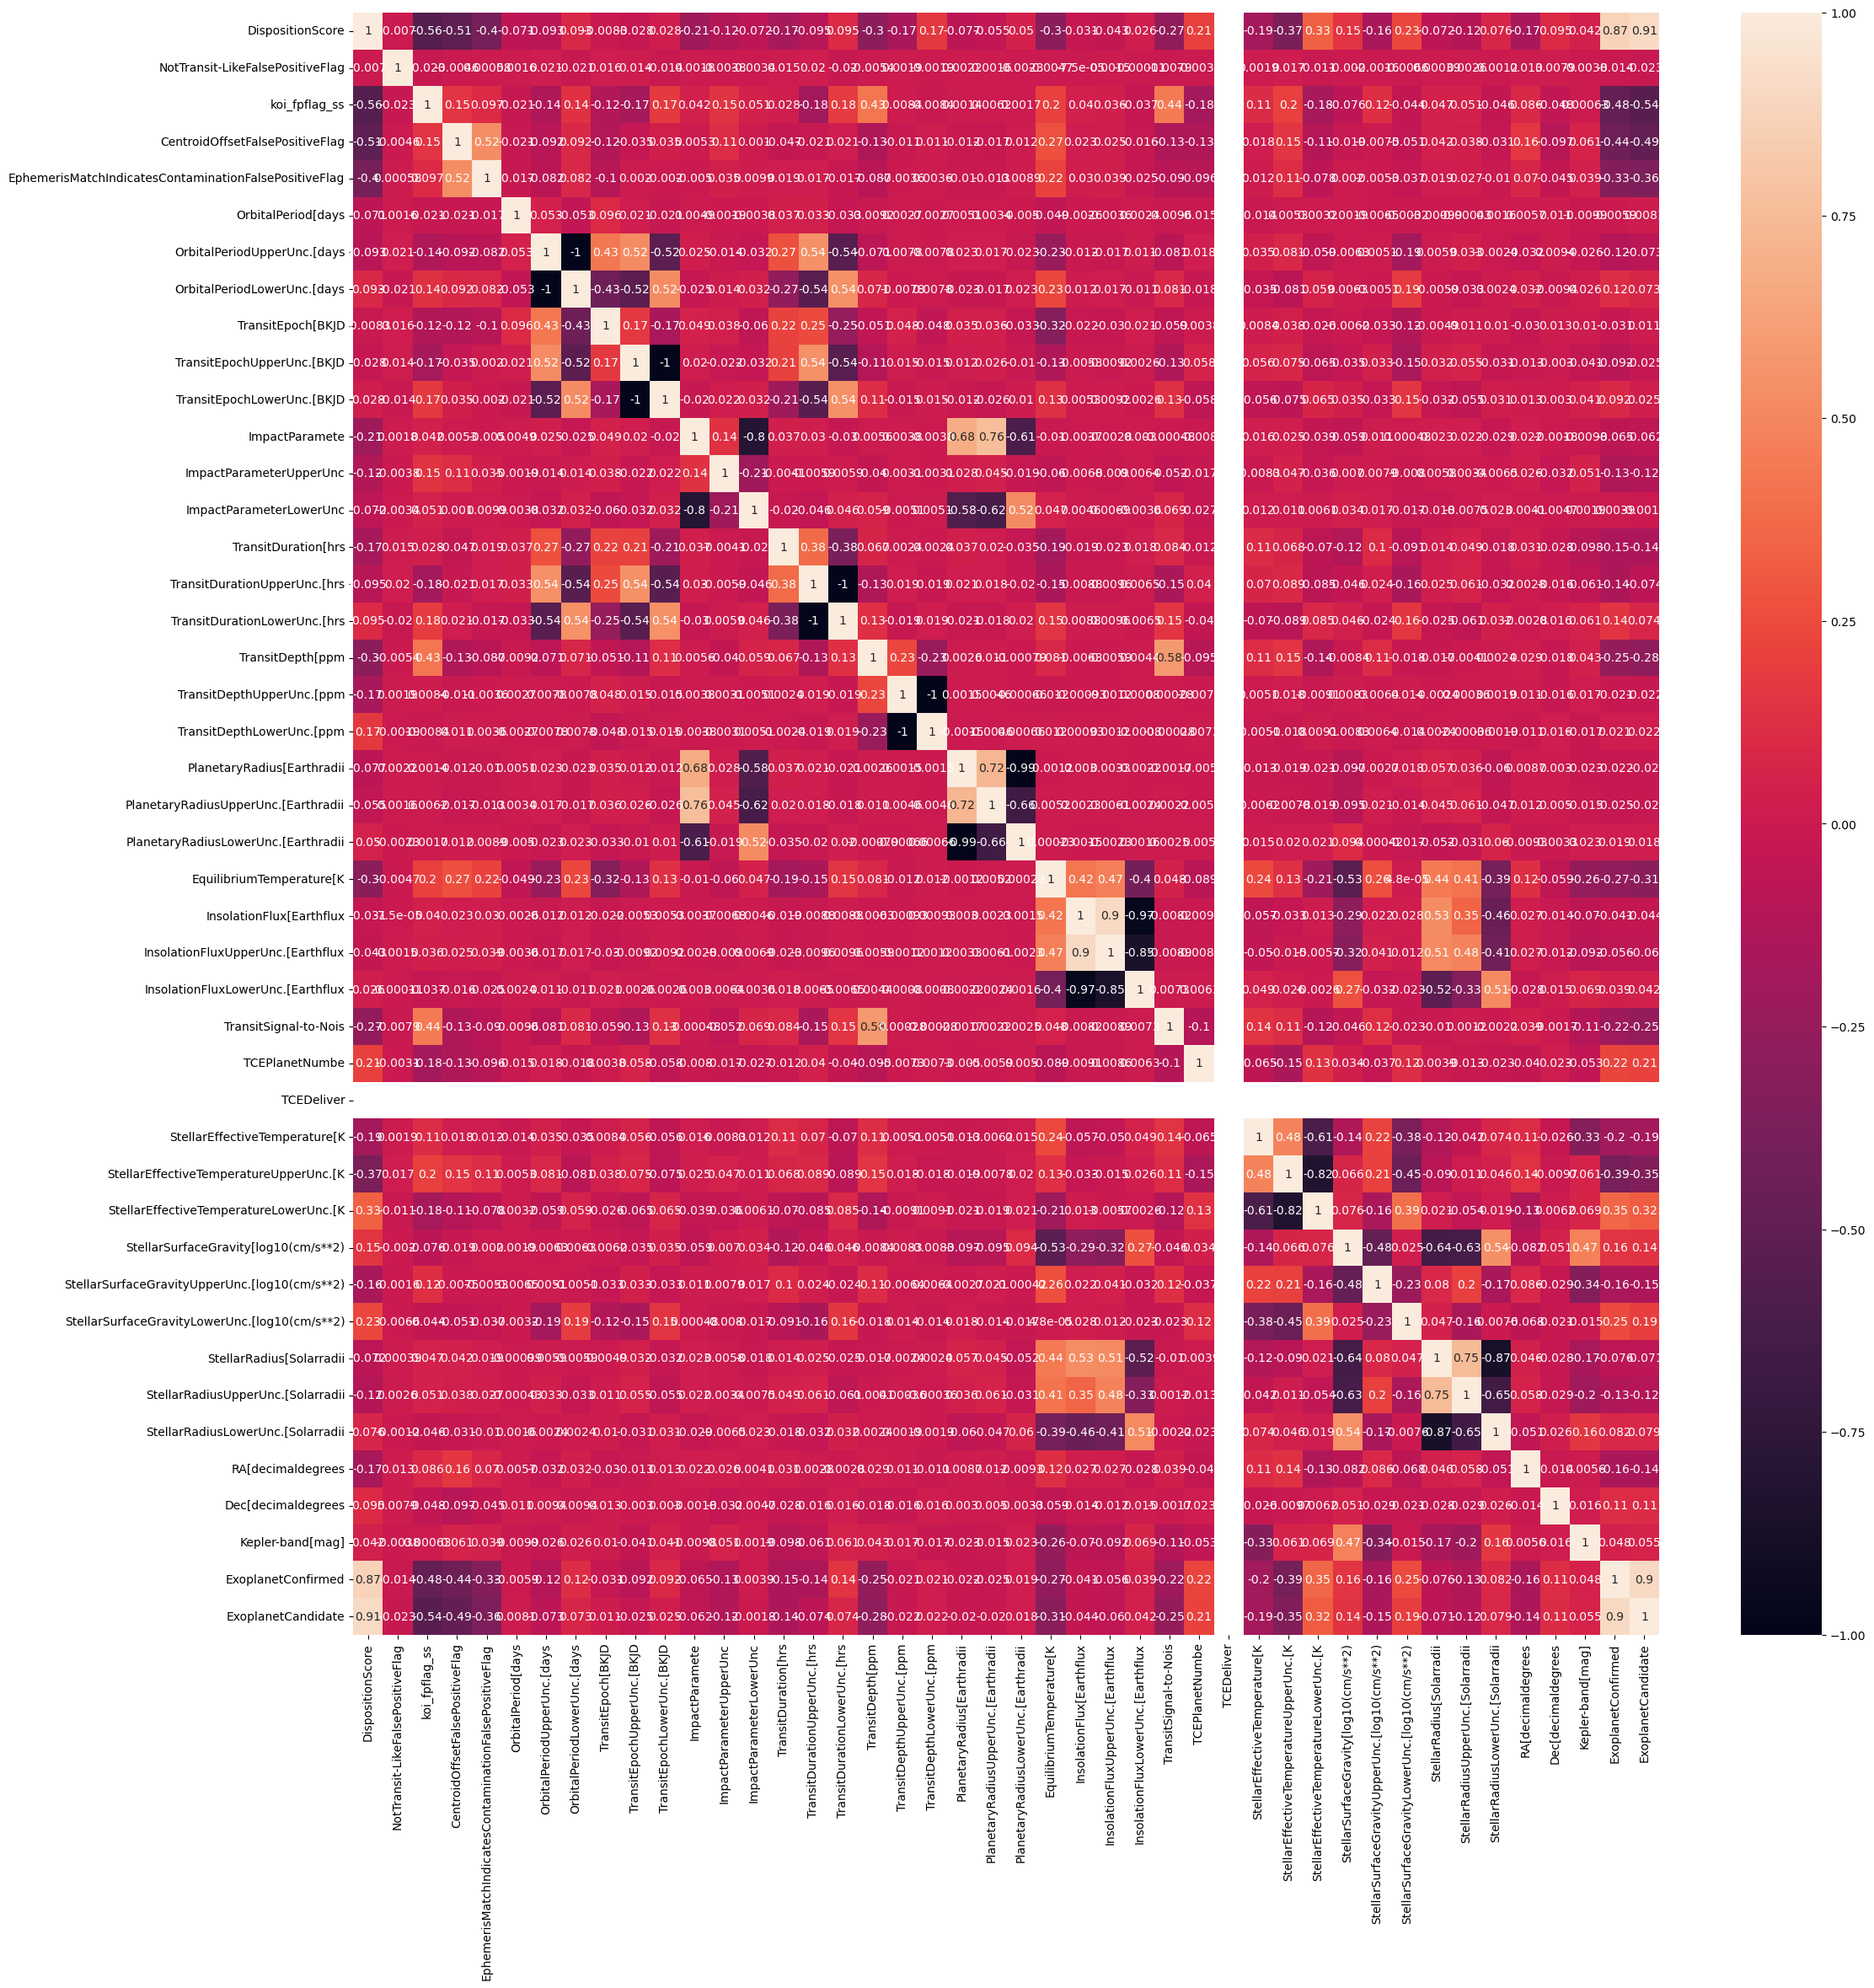

In [33]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,ax=ax)

In [15]:
kepler_data['ExoplanetConfirmed'].unique()

array([2, 1, 0], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
kepler_data.dropna(inplace=True)


In [18]:
train, test = train_test_split(kepler_data, test_size=0.4, random_state=1)


In [19]:
train.shape

(4681, 44)

In [20]:
test.shape

(3122, 44)

In [21]:
train.to_csv('train2.csv',index=False)


In [22]:
test_solution = test['ExoplanetConfirmed']


In [23]:
test_solution.unique()

array([0, 1, 2], dtype=int64)

In [24]:
test=test.drop(['ExoplanetConfirmed'],axis=1)


In [25]:
test_solution.to_csv('test_solution2.csv',index=False)


In [26]:
test.to_csv('test2.csv',index=False)


In [27]:
def evaluation(y_true, y_pred):
    
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_true, y_pred)))
    print('Recall (Macro): ' + str(metrics.recall_score(y_true, y_pred, average='macro')))
    print('F1 Score (Macro): ' + str(metrics.f1_score(y_true, y_pred, average='macro')))
    print('Precision (Macro): ' + str(metrics.precision_score(y_true, y_pred, average='macro')))
    
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_)) 

In [28]:
X = train.drop(['ExoplanetConfirmed'],axis=1)


In [29]:
Y = train['ExoplanetConfirmed']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=.40)


In [31]:
# was getting error: AttributeError: 'Flags' object has no attribute 'c_contiguous'
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a Logistic Regression model with multinomial setting
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.6844634276561665
Recall (Macro): 0.6061668429955639
F1 Score (Macro): 0.5786129852812874
Precision (Macro): 0.6081616279677999

Confusion Matrix:
 TN,  FP, FN, TP
[756  41  96 102  64 249  58  45 462]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.8745328350240257
Recall (Macro): 0.8340653659042516
F1 Score (Macro): 0.8355428090649198
Precision (Macro): 0.8378074879012486

Confusion Matrix:
 TN,  FP, FN, TP
[892   0   1   0 286 129   3 102 460]


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.8852108916177256
Recall (Macro): 0.84223620144294
F1 Score (Macro): 0.8460786711048073
Precision (Macro): 0.857160361285061

Confusion Matrix:
 TN,  FP, FN, TP
[893   0   0   2 270 143   3  67 495]


In [37]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Fit a GMM
gmm = GaussianMixture(n_components=len(np.unique(y_train)), covariance_type='full')
gmm.fit(X_train)

# Predict using GMM
y_pred = gmm.predict(X_test)

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.3475707421249333
Recall (Macro): 0.24300111982082864
F1 Score (Macro): 0.17194928684627575
Precision (Macro): 0.13304721030042918

Confusion Matrix:
 TN,  FP, FN, TP
[651   0 242 415   0   0 565   0   0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.6171916711158569
Recall (Macro): 0.5554668544854979
F1 Score (Macro): 0.554172672863834
Precision (Macro): 0.5579237239269803

Confusion Matrix:
 TN,  FP, FN, TP
[704  84 105 142 122 151 124 111 330]


In [ ]:
from sklearn.svm import SVC

# Create an SVM model
svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


evaluation(y_test, y_pred)